## Import Library

In [ ]:
import os
import pandas as pd
import re
import html
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/ML/indonesia_ai/project_1/'
dt = os.path.join(base_dir, 'tweet.csv')
df = pd.read_csv(dt,encoding='utf-8')

In [ ]:
# show all text
pd.set_option('display.max_colwidth', None)

In [ ]:
# text display rata kiri
# df.head().style.set_properties(**{'text-align': 'left'})
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


In [ ]:
df_1 = df.copy()

<ipython-input-73-31a115d56f71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_1, x='sentimen', palette='viridis')


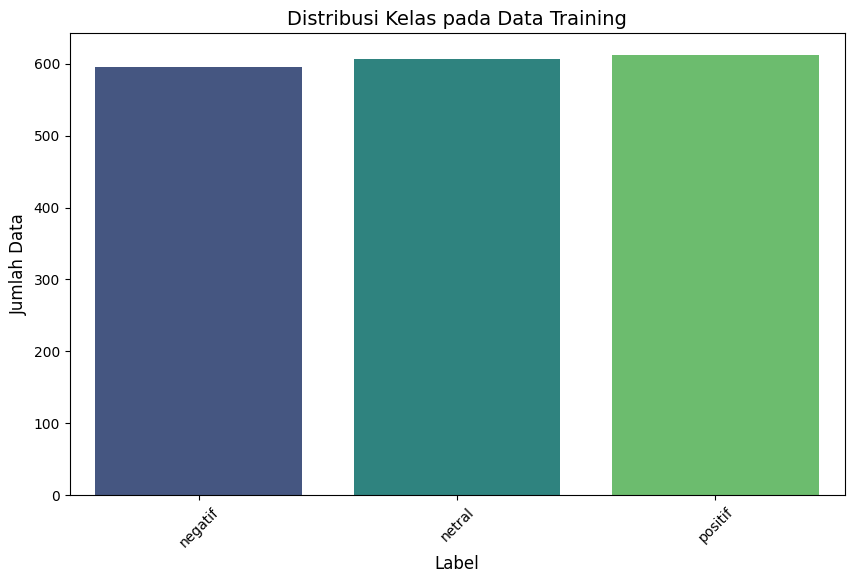

In [ ]:
# Membuat Visualisasi Distribusi Kelas
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='sentimen', palette='viridis')
plt.title('Distribusi Kelas pada Data Training', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 0. Drop column

In [ ]:
df_1 = df.drop(df.columns[0], axis=1)
df_1.head()

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 1. Delete Hastag

In [ ]:
hashtag_regex = r"#(\w+)"
df_1['tweet'] = df_1['tweet'].astype(str)
df_1['tweet'] = df_1['tweet'].apply(lambda text: re.sub(hashtag_regex, '', text))
df_1.head()

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 2. Delete mention

In [ ]:
# Define regular expression to find mentions
mention_regex = r"@(\w+)"
df_1['tweet'] = df_1['tweet'].apply(lambda text: re.sub(mention_regex, '', text))
df_1.head()

,sentimen,tweet
0,negatif,"Kata Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan ?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 3. Delete URL

In [ ]:
# Define regular expression to find URLs
url_regex = r"https?://\S+|www\.\S+"

# Remove URLs using regular expression substitution
df_1['tweet'] = df_1['tweet'].apply(lambda text: re.sub(url_regex, '', text))
df_1.head()

,sentimen,tweet
0,negatif,"Kata Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan ?ðŸ˜œ â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy?"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 4. Lowercase

In [ ]:
# Convert full_text to lowercase
df_1['tweet'] = df_1['tweet'].str.lower()
df_1.head()

,sentimen,tweet
0,negatif,"kata indonesia tidak dihargai bangsa asing! berita ini ðÿ‘‡ pasti hoax buatan penguasa, ya kan ?ðÿ˜œ â€¦"
1,netral,"batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?"
2,netral,"di era jokowi, ekonomi indonesia semakin baik. pic.twitter.com/w2ythnxstp"
3,positif,"bagi sumatera selatan, asian games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. indonesia maju, jokowi hebat!"
4,negatif,"negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. penghasilan negara itu ya dari pajak"


### 5. cek Duplicate

In [ ]:
print("Jumlah duplicate rows:", df_1.duplicated(subset=['tweet']).sum())

Jumlah duplicate rows: 0


### 6. Delete except alphabet, numeric, punctuation

In [ ]:
def clean_text(text):
    # Menghapus karakter selain huruf, angka, dan tanda baca
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\.,!?]', '', text)
    return cleaned_text

In [ ]:
df_1['tweet'] = df_1['tweet'].apply(clean_text)
df_1.head()

,sentimen,tweet
0,negatif,"kata indonesia tidak dihargai bangsa asing! berita ini pasti hoax buatan penguasa, ya kan ?"
1,netral,"batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?"
2,netral,"di era jokowi, ekonomi indonesia semakin baik. pic.twitter.comw2ythnxstp"
3,positif,"bagi sumatera selatan, asian games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. indonesia maju, jokowi hebat!"
4,negatif,"negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. penghasilan negara itu ya dari pajak"


In [ ]:
df_1['tweet'] = df_1['tweet'].astype(str)

In [ ]:
df_1

,sentimen,tweet
0,negatif,"kata indonesia tidak dihargai bangsa asing! berita ini pasti hoax buatan penguasa, ya kan ?"
1,netral,"batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?"
2,netral,"di era jokowi, ekonomi indonesia semakin baik. pic.twitter.comw2ythnxstp"
3,positif,"bagi sumatera selatan, asian games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. indonesia maju, jokowi hebat!"
4,negatif,"negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. penghasilan negara itu ya dari pajak"
...,...,...
1810,netral,negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat
1811,netral,1. hrs ceramah di damai indonesiaku 2. perekonomian makin membaik.
1812,netral,mari bangun bangsa dgn mendukung perekonomian negara bersama pak jokowi. ayo kerja!
1813,netral,"bantu majukan perekonomian bangsa bersama pak jokowi, yuk!"


In [ ]:
# sentiment_map = {'negatif': 0, 'netral': 1, 'positif': 2}
# df_1['sentimen'] = df_1['sentimen'].map(sentiment_map)

In [ ]:
df_2 = df_1.copy()

## Modeling

### Import library

- setelah install restart session agar tidak error saaat running config bert krn masih ngebaca library lama atau belum terbaca librarynya

In [ ]:
!pip install transformers==4.40.0

In [ ]:
# !pip install torch scikit-learn

In [ ]:
# !pip install datasets

In [ ]:
!pip install accelerate -U

In [ ]:
import torch
import transformers
import accelerate

print(torch.__version__)
print(transformers.__version__)
print(accelerate.__version__)

2.3.0+cu121
4.40.0
0.31.0


In [ ]:
from transformers import BertTokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Tokenization

In [ ]:
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

In [ ]:
df_1['input_ids'] = df_1['tweet'].apply(lambda x: tokenizer.encode(x, truncation=True, padding='max_length', max_length=128))

In [ ]:
df_1.head(1)

,sentimen,tweet,input_ids
0,0,kata indonesia harga bangsa asing berita hoax buat kuasa kan,"[3, 1951, 1718, 2661, 2417, 3779, 3524, 15514, 962, 3815, 4889, 2797, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"


### Split data

In [ ]:
# Membagi data menjadi training (80%), validation (10%), dan testing (10%)
train_df, temp_df = train_test_split(df_1, test_size=0.2, stratify=df_1['sentimen'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['sentimen'], random_state=42)

- **`df`**: Ini adalah DataFrame yang berisi data yang ingin Anda bagi. Dalam kasus ini, `df` adalah DataFrame yang telah diolah dan berisi kolom `encoded_label`.
- **`test_size=0.2`**: Parameter ini menentukan proporsi dari dataset asli yang akan digunakan sebagai set data uji (sementara). `0.2` berarti 20% dari dataset asli akan digunakan sebagai data uji (sementara), sedangkan 80% akan digunakan sebagai data pelatihan. Hasilnya adalah `train_df` yang berisi 80% data dan `temp_df` yang berisi 20% data.
- **`stratify=df['encoded_label']`**: Parameter ini memastikan bahwa pembagian data dilakukan dengan stratifikasi berdasarkan kolom `encoded_label`. Ini berarti distribusi kelas dalam data pelatihan dan data uji akan serupa dengan distribusi kelas dalam dataset asli. Hal ini penting untuk memastikan bahwa setiap subset memiliki representasi kelas yang proporsional, yang bisa meningkatkan performa model dan validitas hasil.
- **`random_state=42`**: Parameter ini digunakan untuk menetapkan seed acak. Memberikan nilai pada `random_state` memastikan bahwa pembagian data ini dapat direproduksi. Dengan kata lain, setiap kali Anda menjalankan kode ini dengan `random_state=42`, Anda akan mendapatkan pembagian data yang sama. Ini berguna untuk memastikan hasil yang konsisten ketika melakukan eksperimen.

### Mengonversi data menjadi format yang dapat diproses oleh PyTorch.

In [ ]:
from torch.utils.data import Dataset, DataLoader

class SentimentDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = torch.tensor(self.data.iloc[index]['input_ids'], dtype=torch.long)
        label = torch.tensor(self.data.iloc[index]['sentimen'], dtype=torch.long)
        return {'input_ids': text, 'labels': label}


# Membuat dataset
train_dataset = SentimentDataset(train_df)
val_dataset = SentimentDataset(val_df)
test_dataset = SentimentDataset(test_df)

### indoBert 1
- load model

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Memuat model
model = BertForSequenceClassification.from_pretrained('indolem/indobert-base-uncased', num_labels=3)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### bert dataset config

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    preds, labels = p
    preds = np.argmax(preds, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [ ]:
# Define TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Ensure save strategy matches evaluation strategy
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,  # Log every 10 steps
    load_best_model_at_end=True
)

# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=3,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     logging_steps=10,
# )

# Inisialisasi Trainer must using GPU
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)


#### Train model

In [ ]:
# Start training
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.748600,0.765315,0.668508,0.665412,0.669217,0.665076
2,0.516200,0.754668,0.690608,0.693960,0.690710,0.689083
3,0.522400,0.818644,0.685083,0.683404,0.685610,0.683628


TrainOutput(global_step=546, training_loss=0.6854239951123248, metrics={'train_runtime': 144.7177, 'train_samples_per_second': 30.1, 'train_steps_per_second': 3.773, 'total_flos': 286530511905792.0, 'train_loss': 0.6854239951123248, 'epoch': 3.0})

#### Evaluate

In [ ]:
# Evaluate model
results = trainer.evaluate(val_dataset)

print(f"Test Accuracy: {results.get('eval_accuracy', 'Accuracy not found')}")
print(f"Test Precision: {results.get('eval_precision', 'Precision not found')}")
print(f"Test Recall: {results.get('eval_recall', 'Recall not found')}")
print(f"Test F1 Score: {results.get('eval_f1', 'F1 Score not found')}")

Test Accuracy: 0.6243093922651933
Test Precision: 0.6238988095238095
Test Recall: 0.6255009107468125
Test F1 Score: 0.6160934606179412


In [ ]:
# Evaluate model
results = trainer.evaluate(train_dataset)

print(f"Test Accuracy: {results.get('eval_accuracy', 'Accuracy not found')}")
print(f"Test Precision: {results.get('eval_precision', 'Precision not found')}")
print(f"Test Recall: {results.get('eval_recall', 'Recall not found')}")
print(f"Test F1 Score: {results.get('eval_f1', 'F1 Score not found')}")

Test Accuracy: 0.9724517906336089
Test Precision: 0.9728963702645266
Test Recall: 0.9725153787073677
Test F1 Score: 0.9724960347710798


In [ ]:
# Evaluate model
results = trainer.evaluate(test_dataset)

print(f"Test Accuracy: {results.get('eval_accuracy', 'Accuracy not found')}")
print(f"Test Precision: {results.get('eval_precision', 'Precision not found')}")
print(f"Test Recall: {results.get('eval_recall', 'Recall not found')}")
print(f"Test F1 Score: {results.get('eval_f1', 'F1 Score not found')}")

Test Accuracy: 0.6318681318681318
Test Precision: 0.6399917081260366
Test Recall: 0.6340007827741876
Test F1 Score: 0.6247759364940005


In [ ]:
# Evaluate model preprocessing 2
results = trainer.evaluate(test_dataset)

print(f"Test Accuracy: {results.get('eval_accuracy', 'Accuracy not found')}")
print(f"Test Precision: {results.get('eval_precision', 'Precision not found')}")
print(f"Test Recall: {results.get('eval_recall', 'Recall not found')}")
print(f"Test F1 Score: {results.get('eval_f1', 'F1 Score not found')}")

Test Accuracy: 0.5824175824175825
Test Precision: 0.5865597651489974
Test Recall: 0.583726961192924
Test F1 Score: 0.5813641378999753


In [ ]:
# Evaluate model preprocessing 3
results = trainer.evaluate(test_dataset)

print(f"Test Accuracy: {results.get('eval_accuracy', 'Accuracy not found')}")
print(f"Test Precision: {results.get('eval_precision', 'Precision not found')}")
print(f"Test Recall: {results.get('eval_recall', 'Recall not found')}")
print(f"Test F1 Score: {results.get('eval_f1', 'F1 Score not found')}")

Test Accuracy: 0.6208791208791209
Test Precision: 0.6278702990630215
Test Recall: 0.6232839468550105
Test F1 Score: 0.616724012094672


In [ ]:
predictions = trainer.predict(train_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

accuracy = accuracy_score(labels, preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9641873278236914


In [ ]:
predictions = trainer.predict(val_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

accuracy = accuracy_score(labels, preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7071823204419889


In [ ]:
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

accuracy = accuracy_score(labels, preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6428571428571429


### indobert-2

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

# Muat model dan tokenizer
model_name = "indobenchmark/indobert-base-p2"
tokenizer_1 = BertTokenizer.from_pretrained(model_name)
model_2 = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Tokenisasi data

In [ ]:
df_2['input_ids'] = df_2['tweet'].apply(lambda x: tokenizer_1.encode(x, truncation=True, padding='max_length', max_length=128))

In [ ]:
df_2['attention_mask'] = df_2['tweet'].apply(lambda x: [1] * len(tokenizer_1.encode(x, truncation=True, padding='max_length', max_length=128)))

In [ ]:
df_2.head(2)

,sentimen,tweet,input_ids,attention_mask
0,0,"kata indonesia tidak dihargai bangsa asing! berita ini pasti hoax buatan penguasa, ya kan ?","[2, 661, 300, 119, 13235, 1642, 2945, 30457, 2140, 92, 1195, 18422, 4674, 6931, 30468, 286, 951, 30477, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...]"
1,1,"batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?","[2, 8182, 8618, 30468, 26570, 5237, 3750, 98, 10189, 28679, 9907, 9156, 30371, 30477, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...]"


In [ ]:
# Membagi data menjadi training (80%), validation (10%), dan testing (10%)
train_df, temp_df = train_test_split(df_2, test_size=0.2, stratify=df_2['sentimen'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['sentimen'], random_state=42)

In [ ]:
from torch.utils.data import Dataset
import torch

class TweetDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        input_ids = torch.tensor(self.data.iloc[index]['input_ids'], dtype=torch.long)
        attention_mask = torch.tensor(self.data.iloc[index]['attention_mask'], dtype=torch.long)
        label = torch.tensor(self.data.iloc[index]['sentimen'], dtype=torch.long)
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': label}


# Membuat dataset TensorFlow
train_dataset = TweetDataset(train_df)
val_dataset = TweetDataset(val_df)
test_dataset = TweetDataset(test_df)

In [ ]:
from transformers import Trainer, TrainingArguments

# Define TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
)

# Define compute_metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(p):
    preds, labels = p
    preds = np.argmax(preds, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Initialize Trainer
from transformers import TFBertForSequenceClassification

trainer_2 = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)


In [ ]:
trainer_2.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.855100,1.004428,0.580110,0.647502,0.579964,0.555103
2,0.548500,1.133399,0.552486,0.588594,0.551821,0.533057
3,0.791900,1.185496,0.591160,0.596840,0.590893,0.587934
4,0.353900,1.327420,0.574586,0.578910,0.573953,0.567505
5,0.277100,1.533784,0.585635,0.596019,0.585610,0.588165
6,0.253300,1.657012,0.585635,0.589790,0.585792,0.586539


TrainOutput(global_step=1092, training_loss=0.46144498082307667, metrics={'train_runtime': 289.7447, 'train_samples_per_second': 30.068, 'train_steps_per_second': 3.769, 'total_flos': 573061023811584.0, 'train_loss': 0.46144498082307667, 'epoch': 6.0})

In [ ]:
# Evaluate model
results = trainer_2.evaluate(test_dataset)

print(f"Test Accuracy: {results.get('eval_accuracy', 'Accuracy not found')}")
print(f"Test Precision: {results.get('eval_precision', 'Precision not found')}")
print(f"Test Recall: {results.get('eval_recall', 'Recall not found')}")
print(f"Test F1 Score: {results.get('eval_f1', 'F1 Score not found')}")

Test Accuracy: 0.4230769230769231
Test Precision: 0.5082299915334428
Test Recall: 0.4259710732073126
Test F1 Score: 0.40206273794060055


In [ ]:
# Evaluate model
results = trainer_2.evaluate(train_dataset)

print(f"Test Accuracy: {results.get('eval_accuracy', 'Accuracy not found')}")
print(f"Test Precision: {results.get('eval_precision', 'Precision not found')}")
print(f"Test Recall: {results.get('eval_recall', 'Recall not found')}")
print(f"Test F1 Score: {results.get('eval_f1', 'F1 Score not found')}")

Test Accuracy: 0.6652892561983471
Test Precision: 0.742365660137884
Test Recall: 0.6668037773639846
Test F1 Score: 0.6411335859217596


## Preprocessing 2

- delete number
- delete punctuation
- delete stopwords

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
df_1.head()

,sentimen,tweet
0,0,"kata indonesia tidak dihargai bangsa asing! berita ini pasti hoax buatan penguasa, ya kan ?"
1,1,"batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?"
2,1,"di era jokowi, ekonomi indonesia semakin baik. pic.twitter.comw2ythnxstp"
3,2,"bagi sumatera selatan, asian games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. indonesia maju, jokowi hebat!"
4,0,"negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. penghasilan negara itu ya dari pajak"


In [ ]:
# Inisialisasi StopWordRemover dan Stemmer
factory_stopwords = StopWordRemoverFactory()
stopwords = factory_stopwords.create_stop_word_remover()

factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

# Fungsi untuk membersihkan teks
def preprocess_text(text):
    # Menghapus angka, simbol, dan mengonversi ke lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Menghapus stopwords
    text_no_stopwords = stopwords.remove(text)
    # Melakukan stemming
    text_stemmed = stemmer.stem(text_no_stopwords)
    return text_stemmed

# Mengolah kolom 'text' untuk membersihkan stopwords dan stemming
df_1['tweet'] = df_1['tweet'].apply(preprocess_text)

In [ ]:
df_1.head()

,sentimen,tweet
0,0,kata indonesia harga bangsa asing berita hoax buat kuasa kan
1,1,batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,1,era jokowi ekonomi indonesia makin baik pictwittercomw2ythnxstp
3,2,sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 185 triliun indonesia maju jokowi hebat
4,0,negara ngutang buat bngun infrastruktur udah dipake masyarakat terus masyarakat ngeluh negara ngutang negara pasti ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak


### Preprocessing 3

- delete punctuation
- delete number

In [ ]:
# Fungsi untuk membersihkan teks
def preprocess_text(text):
    # Menghapus angka, simbol, dan mengonversi ke lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

# Mengolah kolom 'text' untuk membersihkan stopwords dan stemming
df_1['tweet'] = df_1['tweet'].apply(preprocess_text)

In [ ]:
df_1.head()

,sentimen,tweet
0,0,kata indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan
1,1,batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy
2,1,di era jokowi ekonomi indonesia semakin baik pictwittercomw2ythnxstp
3,2,bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 185 triliun indonesia maju jokowi hebat
4,0,negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak


## Cendol

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader
from transformers import Trainer
from transformers import MT5Tokenizer, MT5ForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text2text-generation", model="indonlp/cendol-mt5-small-inst")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer_3 = AutoTokenizer.from_pretrained("indonlp/cendol-mt5-small-inst")
model_3 = AutoModelForSeq2SeqLM.from_pretrained("indonlp/cendol-mt5-small-inst", num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
df_1['input_ids'] = df_1['tweet'].apply(lambda x: tokenizer_3.encode(x, truncation=True, padding='max_length', max_length=128))

In [ ]:
# Membagi data menjadi training (80%), validation (10%), dan testing (10%)
train_df, temp_df = train_test_split(df_1, test_size=0.2, stratify=df_1['sentimen'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['sentimen'], random_state=42)

In [ ]:
pip install datasets

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
# Function to tokenize and encode the tweets
def tokenize_and_encode(df, tokenizer, max_length=128):
    return df['tweet'].apply(lambda x: tokenizer.encode(x, truncation=True, padding='max_length', max_length=max_length))

# Tokenize and encode the tweets in each set
train_df['input_ids'] = tokenize_and_encode(train_df, tokenizer_3)
val_df['input_ids'] = tokenize_and_encode(val_df, tokenizer_3)
test_df['input_ids'] = tokenize_and_encode(test_df, tokenizer_3)


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_df, batch_size=32)
val_dataloader = DataLoader(val_df, batch_size=32)
test_dataloader = DataLoader(test_df, batch_size=32)

In [ ]:
# Add labels column
train_df['label'] = train_df['sentimen']
val_df['label'] = val_df['sentimen']
test_df['label'] = test_df['sentimen']

In [ ]:
train_df.head(1)

,sentimen,tweet,input_ids,labels,label
566,negatif,baik kan tim nya pak jokowi?..dikasih duit katanya..karena kami paham betapa gembel nya hidupnya kampret..makanya rela harga diri ditukar sama uang yg buat beli bensin mobil aja kagak cukup,"[5338, 620, 8925, 259, 647, 5157, 1074, 44606, 98797, 135020, 334, 259, 22950, 35571, 260, 260, 4367, 3156, 259, 128148, 330, 30028, 32580, 4554, 259, 647, 9860, 647, 23179, 4426, 260, 260, 72520, 647, 5686, 5476, 5695, 301, 82224, 3038, 259, 11475, 6827, 8722, 18036, 218616, 272, 4771, 19454, 83083, 314, 259, 11649, 259, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",negatif,negatif


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    save_steps=1000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model_3,
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics=lambda p: {"accuracy": p.accuracy},
)

In [ ]:
# Convert DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df[['input_ids', 'label']])
val_dataset = Dataset.from_pandas(val_df[['input_ids', 'label']])

# Define Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer_3, model=model_3)

# Define compute_metrics function (optional)
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer_3.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer_3.batch_decode(labels, skip_special_tokens=True)
    # You can implement more sophisticated metrics here
    return {'accuracy': (decoded_preds == decoded_labels).mean()}

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Initialize Trainer
trainer_3 = Trainer(
    model=model_3,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics  # Optional
)


In [ ]:
# Start training
trainer_3.train()

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`label` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

In [ ]:
predictions = trainer_3.predict(test_df)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

accuracy = accuracy_score(labels, preds)
print(f'Accuracy: {accuracy}')

KeyError: 0

In [ ]:
test_df

,sentimen,tweet,input_ids
163,2,"infrastruktur itu penting untuk perekonomian dan pemerataan,tapi ingat membangun itu semua tidaklah gratis,semua dibangun melalui hutang dan dibayar melalui pajak ke rakyat,.jagalah amanah rakyat jika terpilih kembali dan jangan kamu menghianati demokrasi,.sehat selalu presidenku","[51005, 1456, 15089, 851, 393, 194658, 272, 469, 9193, 295, 123774, 261, 63014, 72837, 326, 71598, 1456, 5184, 1353, 1967, 1636, 261, 147224, 301, 57507, 6752, 4839, 382, 33626, 469, 301, 28159, 6752, 4839, 555, 4652, 513, 31077, 261, 260, 37056, 1967, 259, 262, 167792, 31077, 259, 6493, 767, 58591, 17525, 469, 259, 18578, 6659, 37140, 186461, 259, 83998, 261, 260, 50538, 259, 17239, 75448, 662, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
734,0,"prabowo hartanya trilliunan, tp gaji karyawan sampai sekarang blm lunas","[2502, 185126, 588, 18164, 534, 29663, 34886, 261, 259, 270, 325, 259, 69765, 2050, 60751, 259, 7997, 16391, 8762, 282, 259, 69963, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1795,2,"tidak hanya utk keamanan negeri ini, kemajuan ekonomi, infrastruktur, pendidikan, birokrasi,maritim dan lainnya. berhasil mengarah kearah lbh baik. lanjut y pak 2 periode pic.twitter.comwjbtinhykl","[1353, 259, 4392, 46309, 513, 49767, 259, 33974, 854, 261, 57772, 36063, 10574, 261, 51005, 261, 259, 40290, 261, 698, 177265, 261, 126667, 469, 15257, 260, 693, 6950, 1224, 35654, 513, 35654, 259, 93268, 5338, 260, 259, 24877, 259, 276, 5157, 356, 32327, 10564, 260, 14058, 260, 284, 28428, 316, 15368, 276, 12364, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
197,0,akui kekurangan ya. akui prabowo dulu kristen. sekarang mualaf. ibunya kristen. hashim kristen. gak bisa sholat. wudhu gerakan salah. gak bisa ngaji. dipecat dari tni. 1 dari elit bajingan.,"[2267, 266, 87407, 24537, 528, 260, 2267, 266, 2502, 185126, 11368, 259, 103959, 260, 16391, 4048, 66086, 260, 12215, 647, 259, 103959, 260, 560, 27330, 259, 103959, 260, 30470, 2094, 259, 263, 64677, 260, 414, 164870, 8428, 502, 8158, 260, 30470, 2094, 826, 976, 260, 148674, 2162, 1085, 259, 270, 516, 260, 333, 1085, 15882, 51214, 41154, 260, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1431,0,denger tuh pak jae..nanti gaji dari pak prabowo dan sandiaga gak akan diambil.. diserahkan kepada fakir miskin dan orang yang tidak mampu ... gak kayak ente kekayaan nya nambah banyak....,"[530, 2198, 58047, 5157, 432, 265, 260, 260, 129445, 259, 69765, 1085, 5157, 2502, 185126, 469, 14684, 266, 3544, 30470, 1481, 301, 7977, 260, 260, 41904, 78157, 3181, 899, 15215, 1834, 1999, 469, 2855, 457, 1353, 259, 15923, 480, 30470, 259, 102412, 259, 5531, 22572, 21482, 259, 647, 294, 50141, 3881, 1949, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
...,...,...,...
113,1,demokrat minta prabowo hargai kontribusi presiden sebelumnya,"[65344, 67633, 2502, 185126, 5476, 266, 80371, 522, 75448, 34421, 259, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1693,0,"iya ni gue emosi juga pas nonton tdi, yakali ekonomi mikro semudah membalikkan telapak tangan? butuh proses kali!","[259, 2412, 568, 259, 7285, 259, 143818, 1639, 886, 259, 53439, 259, 270, 720, 261, 528, 10483, 10574, 14247, 303, 9842, 18042, 1185, 502, 39475, 7936, 26466, 291, 259, 19

In [ ]:
# Evaluate model
results = trainer_3.evaluate(test_df)

print(f"Test Accuracy: {results.get('eval_accuracy', 'Accuracy not found')}")
print(f"Test Precision: {results.get('eval_precision', 'Precision not found')}")
print(f"Test Recall: {results.get('eval_recall', 'Recall not found')}")
print(f"Test F1 Score: {results.get('eval_f1', 'F1 Score not found')}")

KeyError: 0